In [1]:
import json
import pandas as pd
import itertools

file_path = r"C:\Users\LENOVO\OneDrive\Desktop\EAA17.20251202T161248.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

print("JSON loaded successfully")
print("Type of data:", type(data))

JSON loaded successfully
Type of data: <class 'dict'>


In [2]:
if isinstance(data, list):
    print("Number of records:", len(data))
    print("Keys in one record:")
    print(data[0].keys())

elif isinstance(data, dict):
    print("Top-level keys:")
    print(data.keys())

Top-level keys:
dict_keys(['class', 'dimension', 'extension', 'href', 'id', 'label', 'link', 'note', 'role', 'size', 'updated', 'value', 'version'])


In [3]:
dim_labels = {}
for dim_name, dim_info in data['dimension'].items():
    dim_labels[dim_name] = list(dim_info['category']['label'].values())

In [4]:
#Generate all combinations
dim_names = list(dim_labels.keys())
all_combinations = list(itertools.product(*dim_labels.values()))

In [5]:
#Flatten DataFrame
df = pd.DataFrame(all_combinations, columns=dim_names)
df['value'] = data['value']  # emission numbers

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.head())
print(df.info())

              statistic tlist(a1)  \
0  Carbon dioxide (CO2)      2009   
1  Carbon dioxide (CO2)      2009   
2  Carbon dioxide (CO2)      2009   
3  Carbon dioxide (CO2)      2009   
4  Carbon dioxide (CO2)      2009   

                                        c04273v05050      value  
0  Manufacture of wood, wood products and article...  1153.4021  
1       Manufacture of paper and paper products (17)    53.6712  
2   Printing and reproduction of recorded media (18)   119.6676  
3  Manufacture of coke and refined petroleum prod...    58.1516  
4  Manufacture of chemicals and chemical products...   929.0375  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statistic     10650 non-null  object 
 1   tlist(a1)     10650 non-null  object 
 2   c04273v05050  10650 non-null  object 
 3   value         10650 non-null  float64
dtypes: float64

In [7]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [8]:
from pymongo import MongoClient
import getpass
from urllib.parse import quote_plus
import os

file_path = r"C:\Users\LENOVO\OneDrive\Desktop\EAA17.20251202T161248.json"
default_db = "greenhouse_data"        #valid database name
default_collection = "raw_emissions"  #valid collection name
if not os.path.exists(file_path):
    print(f"JSON file not found: {file_path}")
    exit()

mongo_username = input("Enter MongoDB Atlas username: ")
mongo_password = getpass.getpass("Enter MongoDB Atlas password: ")
mongo_cluster = input("Enter MongoDB Atlas cluster hostname (e.g., apdv24223387.gunpsst.mongodb.net): ")

mongo_password_enc = quote_plus(mongo_password)

uri = f"mongodb+srv://{mongo_username}:{mongo_password_enc}@{mongo_cluster}/{default_db}?retryWrites=true&w=majority"
try:
    client = MongoClient(uri, serverSelectionTimeoutMS=10000)  # 10-second timeout
    db = client[default_db]
    collection = db[default_collection]
    # Test connection
    client.server_info()
    print("Connected to MongoDB Atlas successfully")
except Exception as e:
    print("Could not connect to MongoDB Atlas:", e)
    exit()
try:
    with open(file_path, "r", encoding="utf-8") as f:
        raw_data = json.load(f)
except Exception as e:
    print("Could not read JSON file:", e)
    exit()
if isinstance(raw_data, dict):
    raw_data = [raw_data]
try:
    result = collection.insert_many(raw_data)
    print(f"Uploaded {len(result.inserted_ids)} documents to '{default_collection}' in database '{default_db}'")
except Exception as e:
    print("Error uploading data:", e)
    exit()
try:
    total_docs = collection.count_documents({})
    sample_doc = collection.find_one()
    print(f"Total documents in collection: {total_docs}")
    print("Sample document:", sample_doc)
except Exception as e:
    print("Error fetching confirmation data:", e)

Enter MongoDB Atlas username:  BithikaMohanty
Enter MongoDB Atlas password:  ········
Enter MongoDB Atlas cluster hostname (e.g., apdv24223387.gunpsst.mongodb.net):  apdv24223387.gunpsst.mongodb.net


Connected to MongoDB Atlas successfully
Uploaded 1 documents to 'raw_emissions' in database 'greenhouse_data'
Total documents in collection: 9
Sample document: {'_id': ObjectId('693d8704e067411ac137275b'), 'class': 'dataset', 'dimension': {'STATISTIC': {'category': {'index': ['EAA17C01', 'EAA17C02', 'EAA17C03', 'EAA17C04', 'EAA17C05', 'EAA17C06', 'EAA17C07', 'EAA17C08', 'EAA17C09', 'EAA17C10'], 'label': {'EAA17C01': 'Carbon dioxide (CO2)', 'EAA17C02': 'Carbon dioxide from biomass (CO2_BIO)', 'EAA17C03': 'Hydrofluorocarbons in CO2 equivalent (HFC_CO2E)', 'EAA17C04': 'Methane (CH4)', 'EAA17C05': 'Methane in CO2 equivalent (CH4_CO2E)', 'EAA17C06': 'Nitrous oxide (N2O)', 'EAA17C07': 'Nitrous oxide in CO2 equivalent (N2O_CO2E)', 'EAA17C08': 'Perfluorocarbons in CO2 equivalent (PFC_CO2E)', 'EAA17C09': 'Sulphur hexafluoride and nitrogen trifluoride in CO2 equivalent (NF3_SF6_CO2E)', 'EAA17C10': 'Total greenhouse gases in CO2 equivalent (GHG)'}, 'unit': {'EAA17C01': {'decimals': 4, 'label': 'T

In [9]:
cursor = collection.find({})

for doc in cursor:
    print(doc)

{'_id': ObjectId('693d8704e067411ac137275b'), 'class': 'dataset', 'dimension': {'STATISTIC': {'category': {'index': ['EAA17C01', 'EAA17C02', 'EAA17C03', 'EAA17C04', 'EAA17C05', 'EAA17C06', 'EAA17C07', 'EAA17C08', 'EAA17C09', 'EAA17C10'], 'label': {'EAA17C01': 'Carbon dioxide (CO2)', 'EAA17C02': 'Carbon dioxide from biomass (CO2_BIO)', 'EAA17C03': 'Hydrofluorocarbons in CO2 equivalent (HFC_CO2E)', 'EAA17C04': 'Methane (CH4)', 'EAA17C05': 'Methane in CO2 equivalent (CH4_CO2E)', 'EAA17C06': 'Nitrous oxide (N2O)', 'EAA17C07': 'Nitrous oxide in CO2 equivalent (N2O_CO2E)', 'EAA17C08': 'Perfluorocarbons in CO2 equivalent (PFC_CO2E)', 'EAA17C09': 'Sulphur hexafluoride and nitrogen trifluoride in CO2 equivalent (NF3_SF6_CO2E)', 'EAA17C10': 'Total greenhouse gases in CO2 equivalent (GHG)'}, 'unit': {'EAA17C01': {'decimals': 4, 'label': 'Thousand Tonnes', 'position': 'end'}, 'EAA17C02': {'decimals': 4, 'label': 'Thousand Tonnes', 'position': 'end'}, 'EAA17C03': {'decimals': 4, 'label': 'Thousand 

In [10]:
# Remove _id before saving
for doc in raw_data:
    doc.pop("_id", None)

with open("extracted_raw_data.json", "w", encoding="utf-8") as f:
    json.dump(raw_data, f, indent=4)

print(f"Extracted {len(raw_data)} records and saved to extracted_raw_data.json")

Extracted 1 records and saved to extracted_raw_data.json


In [11]:
#creating a dataframe out of json
values = raw_data[0]['value']  # this is a list of numbers
print(f"Number of values: {len(values)}")

Number of values: 10650


In [12]:
dimensions = raw_data[0]['dimension']
statistics = dimensions['STATISTIC']['category']['index']
years = dimensions['TLIST(A1)']['category']['index']
sectors = dimensions['C04273V05050']['category']['index']

print("Statistics:", statistics)
print("Years:", years)
print("Sectors (sample):", sectors[:10])


Statistics: ['EAA17C01', 'EAA17C02', 'EAA17C03', 'EAA17C04', 'EAA17C05', 'EAA17C06', 'EAA17C07', 'EAA17C08', 'EAA17C09', 'EAA17C10']
Years: ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Sectors (sample): ['01', '02', '03', '0509', '1012', '1315', '16', '17', '18', '19']


In [13]:
import itertools
combinations = list(itertools.product(statistics, years, sectors))
df = pd.DataFrame(combinations, columns=['statistic', 'year', 'sector'])
df['value'] = values

print(df.head())
print(df.info())

  statistic  year sector      value
0  EAA17C01  2009     01  1153.4021
1  EAA17C01  2009     02    53.6712
2  EAA17C01  2009     03   119.6676
3  EAA17C01  2009   0509    58.1516
4  EAA17C01  2009   1012   929.0375
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   statistic  10650 non-null  object 
 1   year       10650 non-null  object 
 2   sector     10650 non-null  object 
 3   value      10650 non-null  float64
dtypes: float64(1), object(3)
memory usage: 332.9+ KB
None


In [14]:
#standardizing column names 
# Rename columns for simplicity
df.rename(columns={
    'statistic': 'statistic',
    'year': 'year',
    'sector': 'sector',
    'value': 'value'
}, inplace=True)

In [15]:
#converting year to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
#converting value to numeric too
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [16]:
df['sector'] = df['sector'].str.strip()

In [17]:
#checking data again
print(df.head())
print(df.info())
print(df.describe())

  statistic  year sector      value
0  EAA17C01  2009     01  1153.4021
1  EAA17C01  2009     02    53.6712
2  EAA17C01  2009     03   119.6676
3  EAA17C01  2009   0509    58.1516
4  EAA17C01  2009   1012   929.0375
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   statistic  10650 non-null  object 
 1   year       10650 non-null  int64  
 2   sector     10650 non-null  object 
 3   value      10650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 332.9+ KB
None
               year          value
count  10650.000000   10650.000000
mean    2016.000000    3011.251735
std        4.320697   34864.760099
min     2009.000000       0.000000
25%     2012.000000       0.010325
50%     2016.000000       0.783300
75%     2020.000000      22.277250
max     2023.000000  582909.007600


In [18]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [19]:
from urllib.parse import quote_plus
from sqlalchemy import create_engine

db_user = input("Enter PostgreSQL username: ")
db_password = input("Enter PostgreSQL password (special characters allowed): ")
db_host = input("Enter PostgreSQL host (e.g., localhost): ")
db_port = input("Enter PostgreSQL port (default 5432): ")
db_name = input("Enter database name: ")

db_user_escaped = quote_plus(db_user)
db_password_escaped = quote_plus(db_password)

connection_string = f"postgresql+psycopg2://{db_user_escaped}:{db_password_escaped}@{db_host}:{db_port}/{db_name}"

engine = create_engine(connection_string)

print(":D Connection string ready. You can now save your cleaned DataFrame to PostgreSQL.")

table_name = "greenhouse_gas_emissions"

try:
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f"Cleaned data successfully saved to table '{table_name}' in database '{db_name}'")

except Exception as e:
    print("Could not save to PostgreSQL:", e)

try:
    result = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5;", engine)
    print("Sample data from PostgreSQL:")
    print(result)
except Exception as e:
    print("Could not read data back:", e)

Enter PostgreSQL username:  BithikaMohanty
Enter PostgreSQL password (special characters allowed):  APDV@24223387
Enter PostgreSQL host (e.g., localhost):  localhost
Enter PostgreSQL port (default 5432):  5432
Enter database name:  greenhouse_data


:D Connection string ready. You can now save your cleaned DataFrame to PostgreSQL.
Could not save to PostgreSQL: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20/e3q8)
Could not read data back: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20

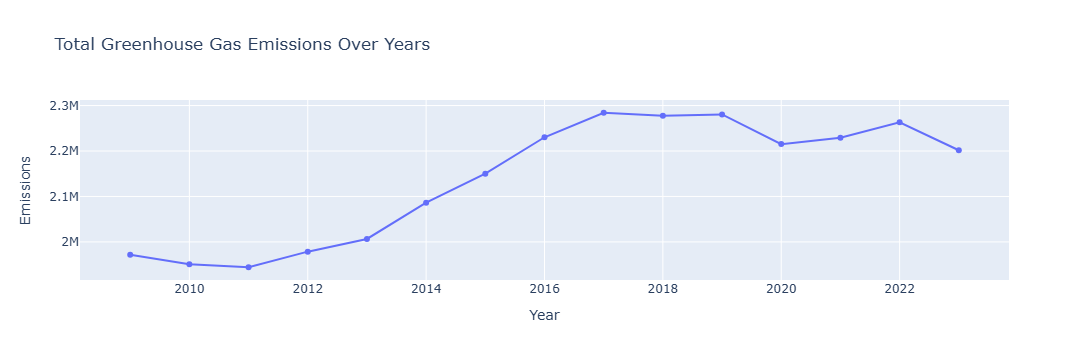

In [21]:
#emissions over time
import plotly.express as px

# Total emissions per year
total_per_year = df.groupby('year')['value'].sum().reset_index()

fig = px.line(total_per_year, x='year', y='value',
              title='Total Greenhouse Gas Emissions Over Years',
              labels={'value':'Emissions', 'year':'Year'},
              markers=True)
fig.show()

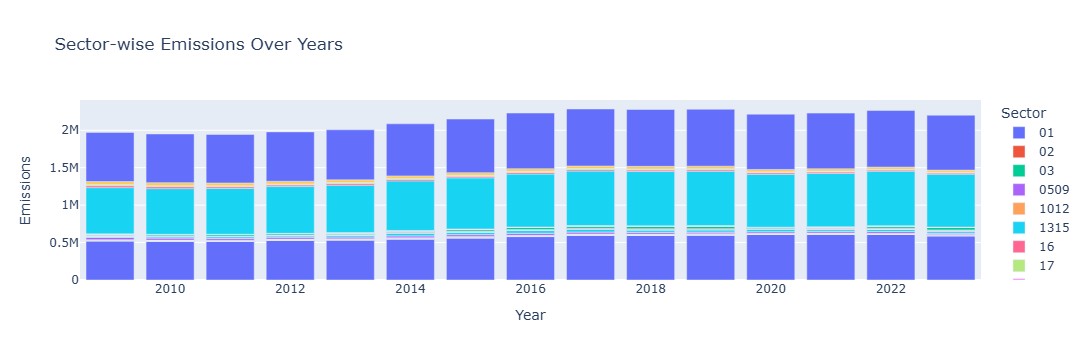

In [22]:
#sector wise emissions
sector_year = df.groupby(['year', 'sector'])['value'].sum().reset_index()

fig = px.bar(sector_year, x='year', y='value', color='sector',
             title='Sector-wise Emissions Over Years',
             labels={'value':'Emissions', 'year':'Year', 'sector':'Sector'})
fig.show()

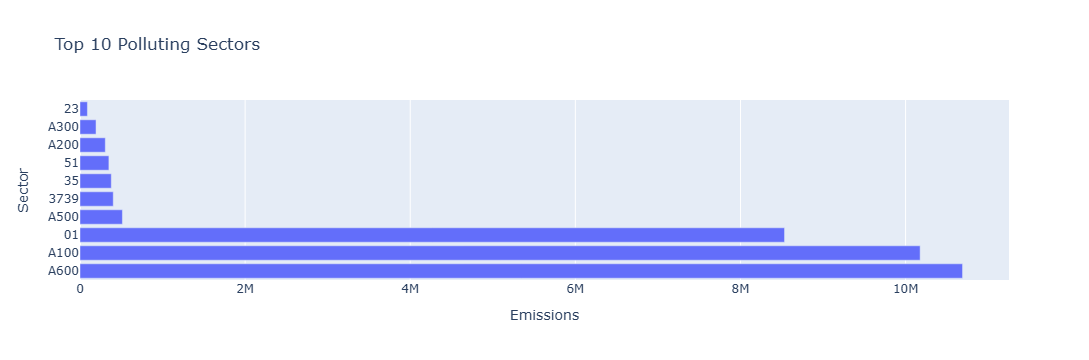

In [23]:
#top polluting sectors 
top_sectors = df.groupby('sector')['value'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(top_sectors.head(10), x='value', y='sector', orientation='h',
             title='Top 10 Polluting Sectors',
             labels={'value':'Emissions', 'sector':'Sector'})
fig.show()

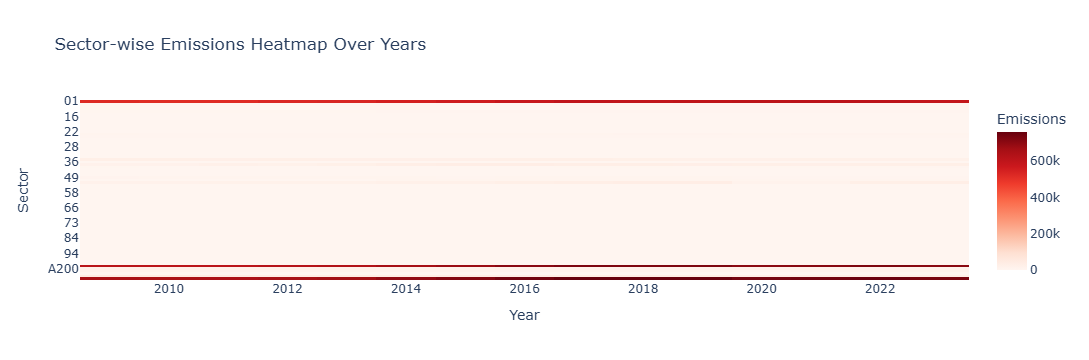

In [24]:
import plotly.express as px

# Pivot data: rows=sectors, columns=years, values=emissions
heatmap_data = df.pivot_table(index='sector', columns='year', values='value', aggfunc='sum')

fig = px.imshow(heatmap_data,
                labels=dict(x="Year", y="Sector", color="Emissions"),
                x=heatmap_data.columns,
                y=heatmap_data.index,
                color_continuous_scale='Reds',
                title="Sector-wise Emissions Heatmap Over Years")

fig.show()

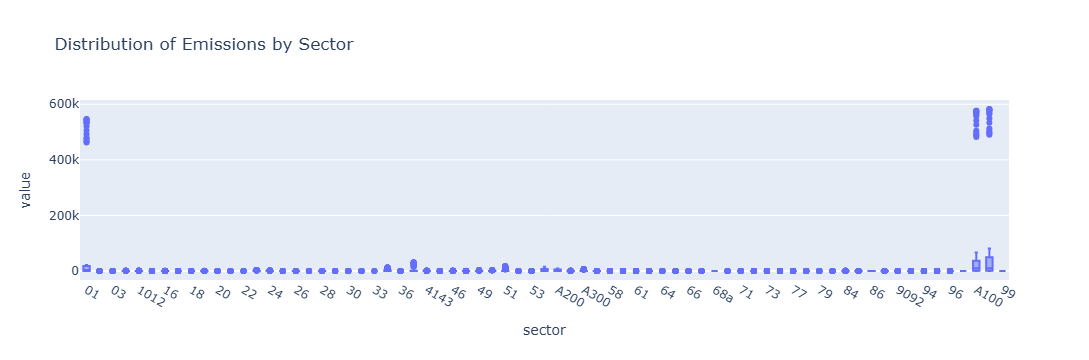

In [25]:
fig = px.box(df, x='sector', y='value', title="Distribution of Emissions by Sector")
fig.show()

In [26]:
#adding another column sector contribution percentage per year
df['sector_percentage'] = df.groupby('year')['value'].transform(lambda x: x / x.sum() * 100)
df['yoy_change'] = df.groupby('sector')['value'].transform(lambda x: x.pct_change() * 100)
df['cumulative'] = df.groupby('sector')['value'].transform(lambda x: x.cumsum())
df.head()

,statistic,year,sector,value,sector_percentage,yoy_change,cumulative
0,EAA17C01,2009,01,1153.4021,0.058492,NaN,1153.4021
1,EAA17C01,2009,02,53.6712,0.002722,NaN,53.6712
2,EAA17C01,2009,03,119.6676,0.006069,NaN,119.6676
3,EAA17C01,2009,0509,58.1516,0.002949,NaN,58.1516
4,EAA17C01,2009,1012,929.0375,0.047114,NaN,929.0375


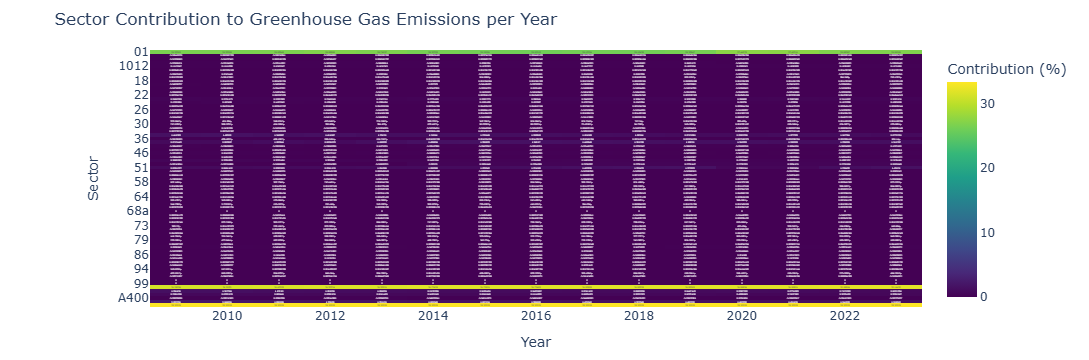

In [27]:
# Pivot data to have sectors as rows and years as columns
heatmap_data = df.pivot_table(
    index='sector',
    columns='year',
    values='sector_percentage',
    aggfunc='sum'
).fillna(0)  # fill NaN with 0

# Create interactive heatmap
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Year", y="Sector", color="Contribution (%)"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale='Viridis',
    aspect="auto",
    text_auto=True
)

fig.update_layout(
    title="Sector Contribution to Greenhouse Gas Emissions per Year",
    xaxis_title="Year",
    yaxis_title="Sector",
    autosize=True,
    margin=dict(l=150, r=50, t=50, b=50)
)

fig.show()


In [28]:
# Basic statistics for 'value'
print(df['value'].describe())

# Statistics for sector percentages
print(df['sector_percentage'].describe())

count     10650.000000
mean       3011.251735
std       34864.760099
min           0.000000
25%           0.010325
50%           0.783300
75%          22.277250
max      582909.007600
Name: value, dtype: float64
count    1.065000e+04
mean     1.408451e-01
std      1.627252e+00
min      0.000000e+00
25%      4.947777e-07
50%      3.641239e-05
75%      1.028100e-03
max      2.631427e+01
Name: sector_percentage, dtype: float64


In [29]:
#yearly growth rate 
df['year'] = df['year'].astype(int)

df = df.sort_values(by=['sector', 'year'])

df['yoY_growth'] = df.groupby('sector')['value'].pct_change() * 100

In [30]:
sector_trends = df.groupby('sector')['sector_percentage'].mean().sort_values(ascending=False)
print(sector_trends.head(10))  # Top 10 contributing sectors on average

sector
A600    3.333333
A100    3.171864
01      2.661234
A500    0.161469
3739    0.124638
35      0.119109
51      0.108256
A200    0.096510
A300    0.060881
23      0.027825
Name: sector_percentage, dtype: float64


In [31]:
# Pivot for correlation
pivot_corr = df.pivot_table(index='year', columns='sector', values='value', aggfunc='sum')

# Correlation matrix
corr_matrix = pivot_corr.corr()
print(corr_matrix)

sector        01        02        03      0509      1012      1315        16  \
sector                                                                         
01      1.000000  0.829837 -0.515122 -0.610568  0.964553 -0.192697  0.122845   
02      0.829837  1.000000 -0.241054 -0.493221  0.787243 -0.102190 -0.103276   
03     -0.515122 -0.241054  1.000000  0.254284 -0.384399  0.579973 -0.326507   
0509   -0.610568 -0.493221  0.254284  1.000000 -0.507616  0.509542 -0.255411   
1012    0.964553  0.787243 -0.384399 -0.507616  1.000000 -0.024930  0.108179   
...          ...       ...       ...       ...       ...       ...       ...   
A200   -0.708987 -0.608430  0.611741  0.679432 -0.596666  0.534462 -0.177690   
A300   -0.500852 -0.279205  0.216484  0.891724 -0.453573  0.416918 -0.158417   
A400   -0.792892 -0.692645  0.164467  0.782017 -0.810079  0.261026 -0.105737   
A500   -0.744305 -0.599354  0.552547  0.824392 -0.643780  0.550722 -0.189549   
A600    0.963531  0.844696 -0.552107 -0.

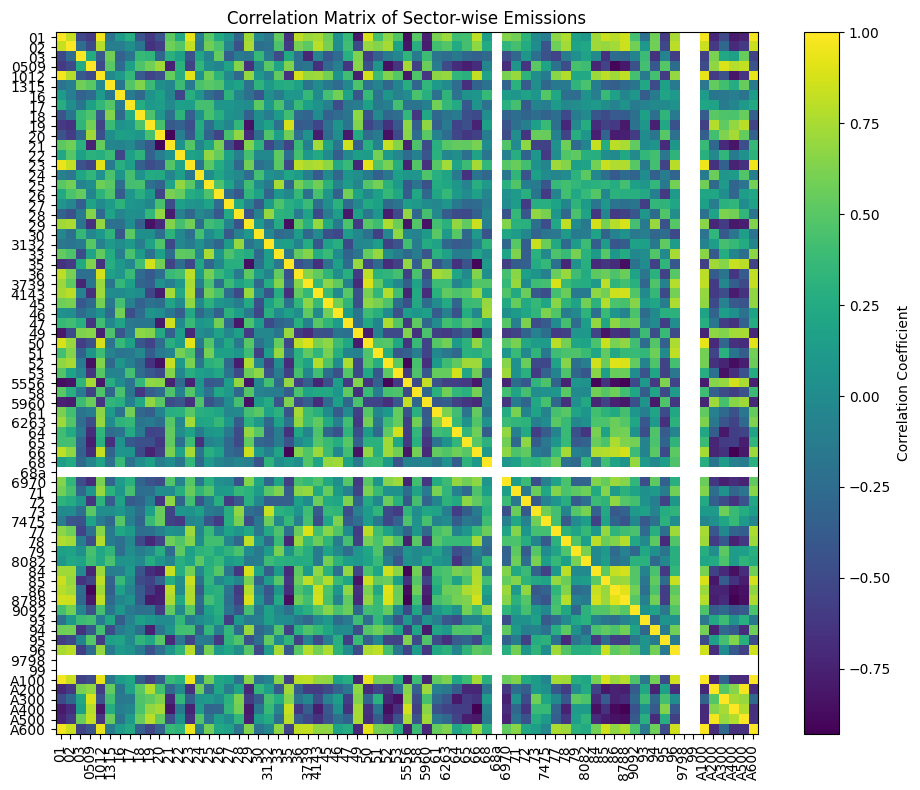

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

plt.title("Correlation Matrix of Sector-wise Emissions")
plt.tight_layout()
plt.show()


In [46]:
strong_corr = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

strong_corr[strong_corr.abs() > 0.7]

sector  sector
A100    A600      0.998285
01      A100      0.970405
        1012      0.964553
A200    A500      0.964385
01      A600      0.963531
                    ...   
20      21       -0.904990
0509    86       -0.906974
8788    A400     -0.921205
5556    8788     -0.921396
66      A400     -0.930405
Length: 256, dtype: float64

In [32]:
# Z-score method
from scipy.stats import zscore

df['z_score'] = df.groupby('year')['value'].transform(lambda x: zscore(x))
outliers = df[df['z_score'].abs() > 3]
print(outliers)

     statistic  year sector        value  sector_percentage    yoy_change  \
3195  EAA17C04  2009     01  469111.4387          23.789823  1.261517e+07   
3266  EAA17C04  2010     01  462035.8771          23.686542 -1.508290e+00   
3337  EAA17C04  2011     01  464657.0492          23.899184  5.673092e-01   
3408  EAA17C04  2012     01  477499.4109          24.133635  2.763837e+00   
3479  EAA17C04  2013     01  478812.6152          23.863259  2.750169e-01   
3550  EAA17C04  2014     01  492369.2839          23.600090  2.831310e+00   
3621  EAA17C04  2015     01  505528.4686          23.512528  2.672625e+00   
3692  EAA17C04  2016     01  521095.5672          23.364911  3.079371e+00   
3763  EAA17C04  2017     01  536287.3931          23.478148  2.915363e+00   
3834  EAA17C04  2018     01  532081.4537          23.362486 -7.842697e-01   
3905  EAA17C04  2019     01  539258.2545          23.646062  1.348816e+00   
3976  EAA17C04  2020     01  545381.6611          24.620175  1.135524e+00   

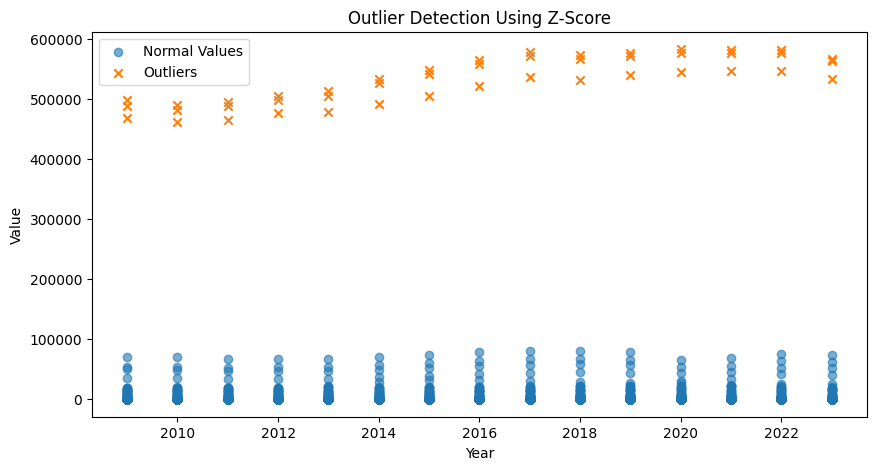

In [34]:
import matplotlib.pyplot as plt
normal = df[df['z_score'].abs() <= 3]
outliers = df[df['z_score'].abs() > 3]

plt.figure(figsize=(10, 5))
plt.scatter(normal['year'], normal['value'], label='Normal Values', alpha=0.6)
plt.scatter(outliers['year'], outliers['value'], label='Outliers', marker='x')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Outlier Detection Using Z-Score')
plt.legend()

plt.show()

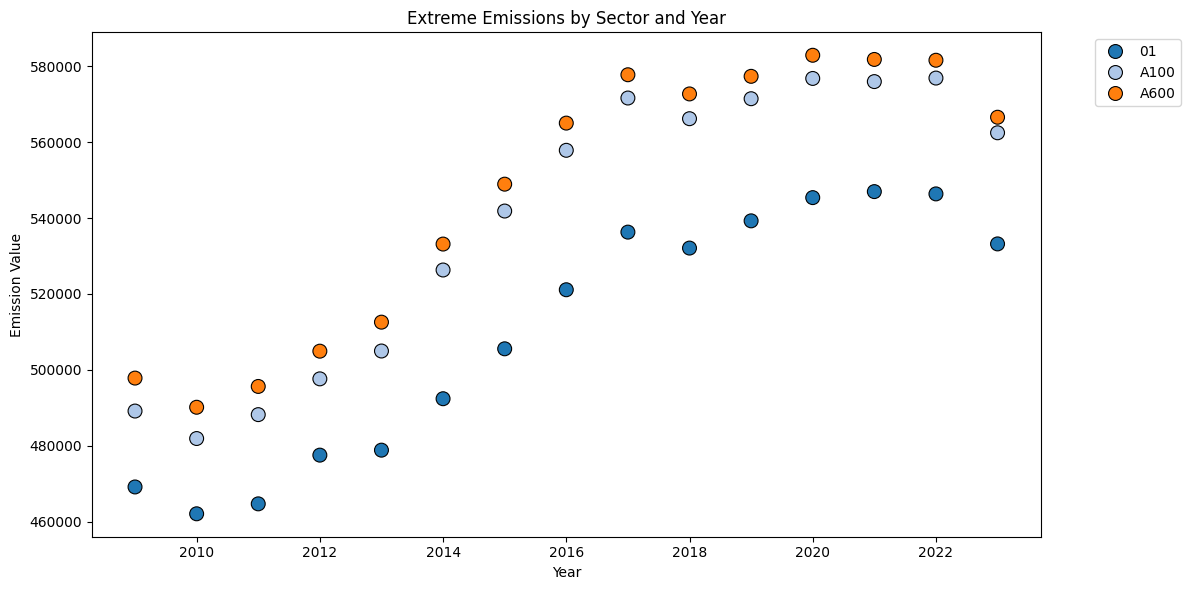

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
extremes = df[df['z_score'].abs() > 3]
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=extremes,
    x='year',
    y='value',
    hue='sector',
    palette='tab20',
    s=100,
    edgecolor='black'
)

plt.title('Extreme Emissions by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Emission Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [43]:
yearly_total = df.groupby('year')['value'].sum().reset_index().rename(columns={'value': 'total_emissions'})
df_contrib = df.merge(yearly_total, on='year')
df_contrib['contribution_pct'] = (df_contrib['value'] / df_contrib['total_emissions']) * 100
top_sectors = df_contrib.groupby(['year', 'sector'])['contribution_pct'].sum().reset_index()
top_sectors = top_sectors.sort_values(['year', 'contribution_pct'], ascending=[True, False])

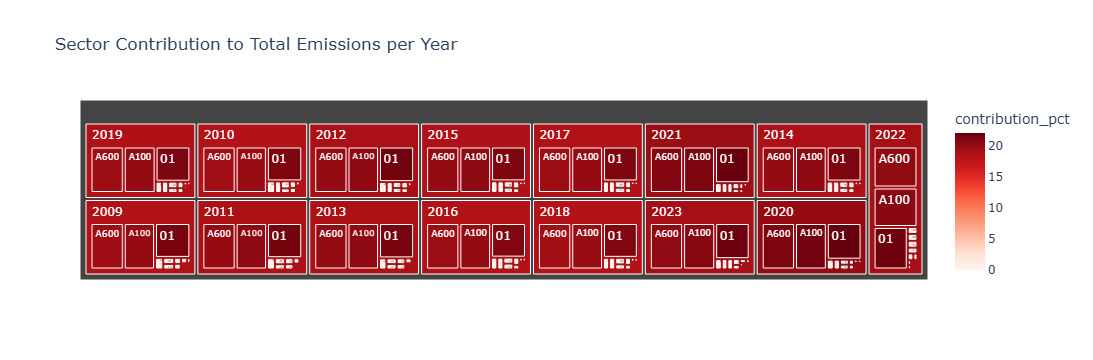

In [46]:
fig_treemap = px.treemap(df_contrib, 
                         path=['year', 'sector'], 
                         values='contribution_pct',
                         color='contribution_pct',
                         color_continuous_scale='Reds',
                         title='Sector Contribution to Total Emissions per Year')

fig_treemap.show()

In [48]:
summary = []
top_overall = df_contrib.groupby('sector')['contribution_pct'].mean().sort_values(ascending=False).head(5)

summary.append("Top 5 sectors by average contribution (%):")
for sector, pct in top_overall.items():
    summary.append(f"- {sector}: {pct:.2f}%")

summary.append("\nTop contributing sector per year:")
for year, group in df_contrib.groupby('year'):
    top_sector = group.loc[group['contribution_pct'].idxmax()]
    summary.append(f"- {year}: {top_sector['sector']} ({top_sector['contribution_pct']:.2f}%)")

summary.append("\nSectors with biggest change in contribution over time:")
sector_trends = df_contrib.groupby('sector').apply(lambda x: x['contribution_pct'].iloc[-1] - x['contribution_pct'].iloc[0])
sector_trends = sector_trends.sort_values(ascending=False)
top_increase = sector_trends.head(3)
top_decrease = sector_trends.tail(3)

summary.append("Biggest increases:")
for sector, change in top_increase.items():
    summary.append(f"- {sector}: +{change:.2f}%")

summary.append("Biggest decreases:")
for sector, change in top_decrease.items():
    summary.append(f"- {sector}: {change:.2f}%")

summary.append("\nYears with extreme total emissions:")
extremes = df_contrib.groupby('year')['total_emissions'].sum()
high_year = extremes.idxmax()
low_year = extremes.idxmin()
summary.append(f"- Highest emissions: {high_year} ({extremes[high_year]:,.2f})")
summary.append(f"- Lowest emissions: {low_year} ({extremes[low_year]:,.2f})")

print("\n".join(summary))

Top 5 sectors by average contribution (%):
- A600: 3.33%
- A100: 3.17%
- 01: 2.66%
- A500: 0.16%
- 3739: 0.12%

Top contributing sector per year:
- 2009: A600 (25.25%)
- 2010: A600 (25.13%)
- 2011: A600 (25.49%)
- 2012: A600 (25.52%)
- 2013: A600 (25.54%)
- 2014: A600 (25.55%)
- 2015: A600 (25.53%)
- 2016: A600 (25.33%)
- 2017: A600 (25.29%)
- 2018: A600 (25.15%)
- 2019: A600 (25.32%)
- 2020: A600 (26.31%)
- 2021: A600 (26.10%)
- 2022: A600 (25.70%)
- 2023: A600 (25.73%)

Sectors with biggest change in contribution over time:
Biggest increases:
- A100: +1.04%
- 01: +0.88%
- A600: +0.79%
Biggest decreases:
- A200: -0.19%
- A500: -0.26%
- 35: -0.29%

Years with extreme total emissions:
- Highest emissions: 2017 (1,621,780,629.35)
- Lowest emissions: 2011 (1,380,409,064.06)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8600\1213672504.py:14: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



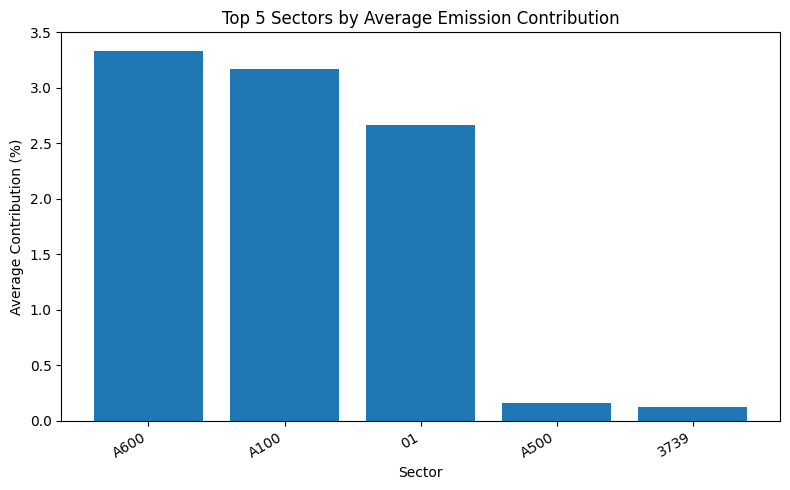

In [44]:
# Top 5 sectors
top_overall = (
    df_contrib.groupby('sector')['contribution_pct']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8, 5))
plt.bar(top_overall.index, top_overall.values)
plt.xlabel("Sector")
plt.ylabel("Average Contribution (%)")
plt.title("Top 5 Sectors by Average Emission Contribution")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### RQ1. How have total greenhouse gas emissions evolved over time?

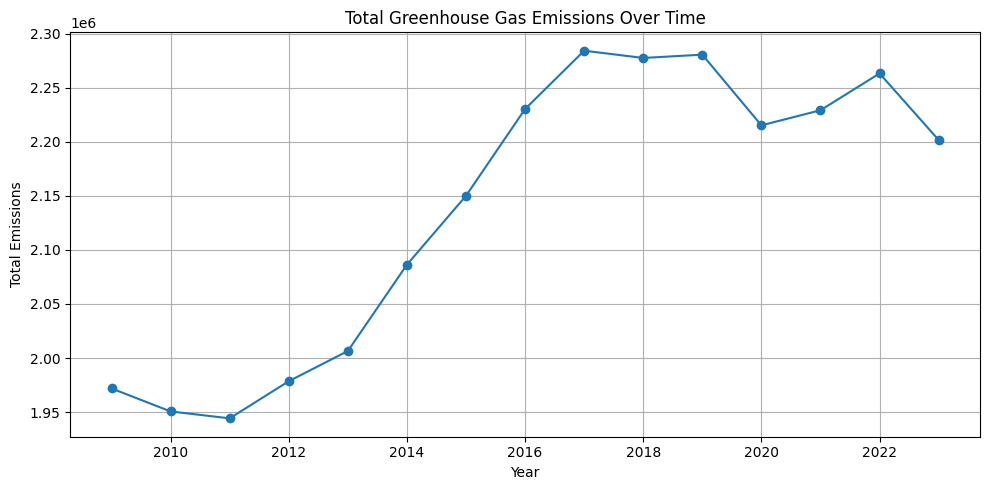

In [25]:
import matplotlib.pyplot as plt
emissions_by_year = (
    df.groupby("year", as_index=False)["value"]
      .sum()
      .rename(columns={"value": "total_emissions"})
)

plt.figure(figsize=(10, 5))
plt.plot(
    emissions_by_year["year"],
    emissions_by_year["total_emissions"],
    marker="o"
)
plt.title("Total Greenhouse Gas Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.grid(True)
plt.tight_layout()
plt.show()

### RQ2: Which sectors contribute most to aggregate greenhouse gas emissions?

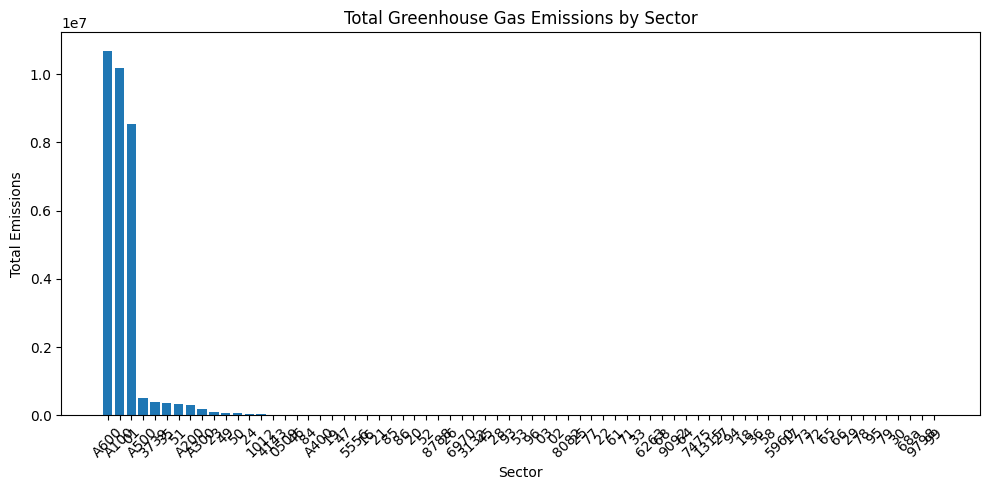

In [26]:
emissions_by_sector = (
    df.groupby("sector", as_index=False)["value"]
      .sum()
      .sort_values("value", ascending=False)
)

plt.figure(figsize=(10, 5))
plt.bar(
    emissions_by_sector["sector"],
    emissions_by_sector["value"]
)
plt.title("Total Greenhouse Gas Emissions by Sector")
plt.xlabel("Sector")
plt.ylabel("Total Emissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### RQ3. How is total emissions distributed across different greenhouse gases?

In [32]:
emissions_by_gas = (
    df
    .groupby("statistic", as_index=False)["value"]
    .sum()
    .rename(columns={"value": "total_emissions"})
    .sort_values("total_emissions", ascending=False)
)

emissions_by_gas.head()

,statistic,total_emissions
3,EAA17C04,2.456645e+07
9,EAA17C10,3.252100e+06
0,EAA17C01,2.278653e+06
5,EAA17C06,9.065029e+05
4,EAA17C05,6.878606e+05


In [34]:
emissions_year_gas = (
    df
    .groupby(["year", "statistic"], as_index=False)["value"]
    .sum()
)

emissions_year_gas.head()

,year,statistic,value
0,2009,EAA17C01,1.493707e+05
1,2009,EAA17C02,3.586282e+03
2,2009,EAA17C03,3.000135e+03
3,2009,EAA17C04,1.493429e+06
4,2009,EAA17C05,4.181600e+04


In [35]:
pivot_year_gas = emissions_year_gas.pivot(
    index="year",
    columns="statistic",
    values="value"
)

pivot_year_gas.head()

statistic,EAA17C01,EAA17C02,EAA17C03,EAA17C04,EAA17C05,EAA17C06,EAA17C07,EAA17C08,EAA17C09,EAA17C10
year,,,,,,,,,,
2009,149370.7334,3586.2824,3000.1347,1.493429e+06,41816.0035,55967.8405,14831.4779,227.8017,212.2537,209458.4051
2010,148419.1969,3974.5157,3049.0114,1.470366e+06,41170.2349,59074.2178,15654.6680,126.8766,185.9420,208605.9299
2011,139763.2135,4036.9533,3123.4038,1.486820e+06,41630.9632,54788.0689,14518.8382,43.3242,216.7493,199296.4923
2012,141084.8060,4316.7162,3092.9589,1.514715e+06,42412.0199,56163.3660,14883.2916,26.0982,185.3077,201684.4818
2013,139465.4976,4990.2273,3181.5041,1.537664e+06,43054.5795,60122.7108,15932.5184,22.7220,197.2055,201854.0272


### RQ4. Do emission levels vary significantly across gases in terms of statistical dispersion and outliers?

<Figure size 1400x600 with 0 Axes>

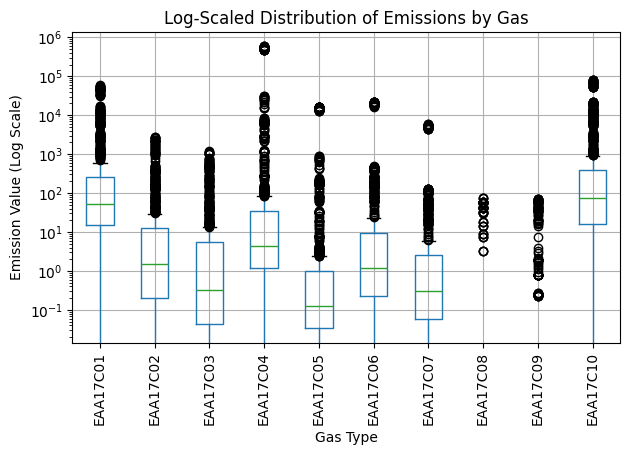

In [36]:
plt.figure(figsize=(14, 6))
df.boxplot(column="value", by="statistic", rot=90)
plt.yscale("log")
plt.title("Log-Scaled Distribution of Emissions by Gas")
plt.suptitle("")
plt.xlabel("Gas Type")
plt.ylabel("Emission Value (Log Scale)")
plt.tight_layout()
plt.show()

### RQ5. Are emission changes over time uniform across gases, or are some gases driving volatility?

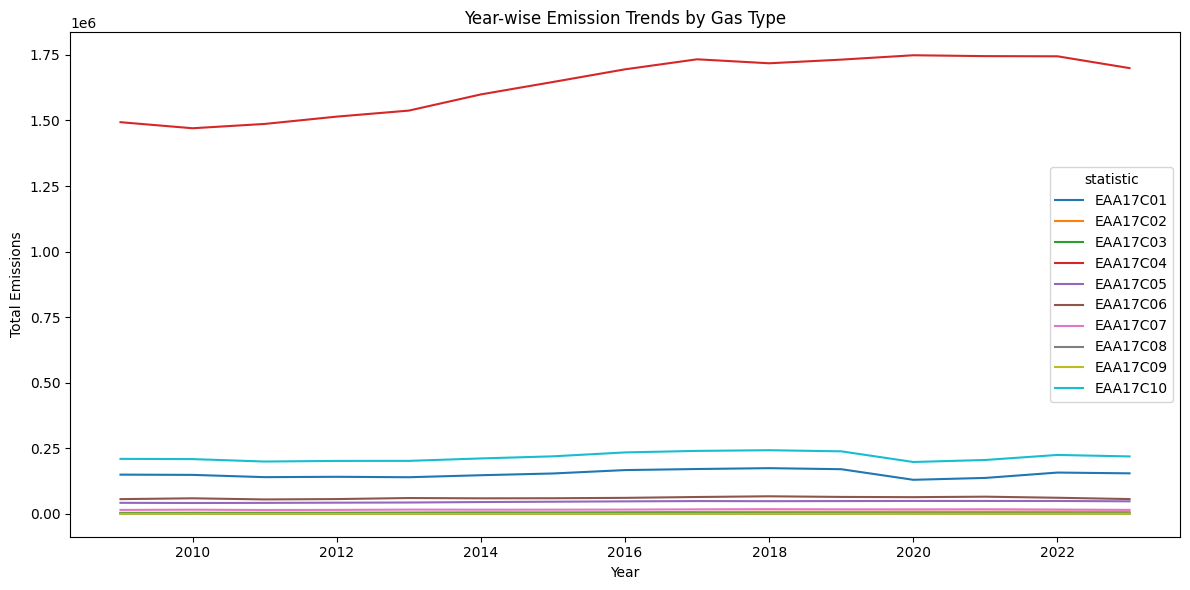

In [37]:
emissions_year_gas = (
    df.groupby(["year", "statistic"], as_index=False)["value"]
      .sum()
)

pivot_year_gas = emissions_year_gas.pivot(
    index="year",
    columns="statistic",
    values="value"
)

pivot_year_gas.plot(figsize=(12, 6))
plt.title("Year-wise Emission Trends by Gas Type")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.tight_layout()
plt.show()